# Setup

Simulations from Chaste are saved to 

`$CHASTE_TEST_OUTPUT + output_directory`

based on the environment variable `$CHASTE_TEST_OUTPUT`.

In addition to setting `$CHASTE_TEST_OUTPUT`, the path also needs to be directly edited in `MesenchymalCondensationSimulation.cpp`, `CartilageSheetSimulation.cpp` and `MissingColumnSimulation.cpp` for the apps, as well as `distribute_executable.py` for the postprocessing scripts. 

Then, compile the MesenchymalCondensationSimulation app in the chaste build folder.

In [1]:
%%bash
cd ../../chaste_build/
make MesenchymalCondensationSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 16%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 22%] Built target chaste_ode
[ 38%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
[100%] Built target chaste_project_CartilageCBM
[100%] Built target MesenchymalCondensationSimulation


In [1]:
import sys
sys.path.append('../analysis')
sys.path.append('../')

import numpy as np
import time 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 4.0,
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
          'font.size': 12,
          'axes.titlepad': 12,
          'axes.labelpad': 12,
          'font.family': 'serif',
          'mathtext.fontset': 'cm',
         }
plt.rcParams.update(params)

defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

path_to_plots = 'data/plots/'

# Run simulations and post-processing

In [26]:
output_directory = 'exp-draft/mesenchymal_condensation/angle/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ''
#flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 80.0' # final time 80h
flags = flags + ' --sw 8' # 8 cells in x direction
flags = flags + ' --sd 12' # 12 cells in y direction
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0 -> repulsion only
flags = flags + ' --A 1.0' # 100% of stem cells activated
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --u 3.5' # set distance between boundaries
flags = flags + ' --psl 4' # patch size limit set to 4
flags = flags + ' --g1t 10.0' # g1 phase duration for transit cells (exponentially distributed)
flags = flags + ' --ds 3.0' # s phase duration for all cells (fixed)
flags = flags + ' --sc 1.075' # scale the initial configuration in x-y direction
#flags = flags + ' --dt 0.004' # half the default time step
#flags = flags + ' --continue'
#flags = flags + ' --flat'
flags = flags + ' --z 0.01227' # zenith angle perturbation value
flags = flags + ' --lb0' #have lower bound at z=0, ie. symmetrical boundaries=false

#flags = flags + ' --rdd' #random division directions

# put path to executable here
executable='/home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation'

In [27]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=8, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230904-105631/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.01227 --lb0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230904-105631/ --S 1 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.01227 --lb0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230904-105631/ --S 2 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.01227 --lb0
nice -n 19 /home/kubuntu1804

output_directory = 'exp-draft/mesenchymal_condensation/continue/20220301-132201/'

In [28]:
de.run_postprocessing_multiple_random_seeds(8, output_directory, start_time=0)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/angle/20230904-105631/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/angle/20230904-105631/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/angle/20230904-105631/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/angle/20230904-105631/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/angle/20230904-105631/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/angle/20230904-105631/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/angle/20230904-105631/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesench

# Plot of the mesenchymal condensation

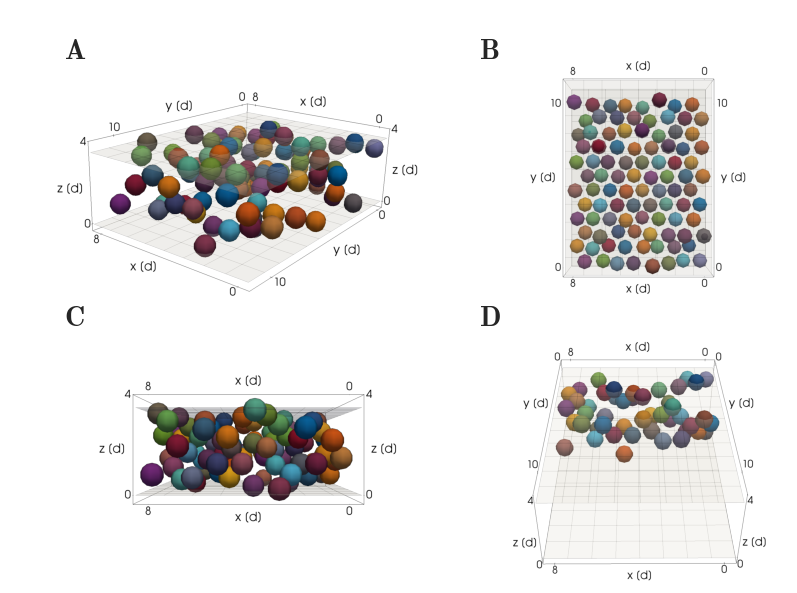

In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), sharey='col', sharex='col',
                                             gridspec_kw={ 'hspace': 0.001, 'wspace':0.00001},
                                             #tight_layout=True
                                            )

initial = mpimg.imread('data/plots_manual/initial_mesenchymal_condensation.png')
#crop
initial = initial[150:-150, 480:-480]
ax1.imshow(initial)
#ax1.grid(False)
ax1.axis('off')
ax1.annotate(r'$\bf A$', (0.08, 0.9), xycoords='figure fraction', fontsize=28)

xy = mpimg.imread('data/plots_manual/initial_mesenchymal_condensation_xy.png')
#crop
xy = xy[50:-50, 600:-600]
ax2.imshow(xy)
#ax1.grid(False)
ax2.axis('off')
#ax2.set_title(r'$\bf b$', loc='left', fontsize=28)
ax2.annotate(r'$\bf B$', (0.6, 0.9), xycoords='figure fraction', fontsize=28)

xz = mpimg.imread('data/plots_manual/initial_mesenchymal_condensation_xz.png')
#crop
xz = xz[150:-150, 480:-480]
ax3.imshow(xz)
#ax1.grid(False)
ax3.axis('off')
#ax3.set_title(r'$\bf c$', loc='left', fontsize=28)
ax3.annotate(r'$\bf C$', (0.08, 0.45), xycoords='figure fraction', fontsize=28)

th = mpimg.imread('data/plots_manual/initial_mesenchymal_condensation_view2_threshold.png')
#crop
th = th[50:-50, 600:-600]
ax4.imshow(th)
#ax1.grid(False)
ax4.axis('off')
#ax4.set_title(r'$\bf d$', loc='left', fontsize=28)
ax4.annotate(r'$\bf D$', (0.6, 0.45), xycoords='figure fraction', fontsize=28)

plt.savefig(path_to_plots+'mesenchymal_condensation.pdf', bbox_inches='tight', dpi=600)
plt.savefig(path_to_plots+'Fig3.pdf', bbox_inches='tight', dpi=600)

# A repulsion only force and oriented cell division enable column growth

## Data:
- 8 random seeds, lb0:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-152730/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0
- 8 random seeds, lb0, rdd
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-155402/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0 --rdd


## Average patch projection area

In [3]:
#dir_directed = 'exp-draft/mesenchymal_condensation/continue/20200505-141629/'
dir_directed = 'data/mesenchymal_condensation/orientation/20220223-152730/'
dir_random = 'data/mesenchymal_condensation/orientation/20220223-155402/'

# # save label-path tuple
# with open(path_to_label_files+'oriented_cd', 'w') as f:
#     f.write(dir_directed+'0/')
# with open(path_to_label_files+'random_cd', 'w') as f:
#     f.write(dir_random+'0/')


## Simulation snapshots

Note: the path must be adjusted to the new location of the data

In [65]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-152730/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-152730/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x5565f1a52b90): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

In [66]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x561156b33690): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

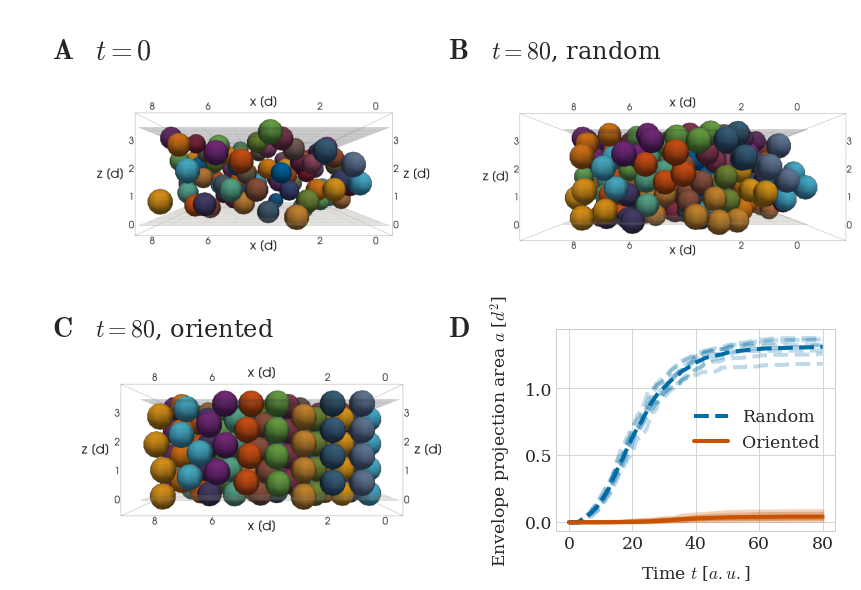

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.01, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_directed + '0/results_from_time_0/') 


initial = mpimg.imread(dir_directed+'/0/threshold_48_minus_y_t0.png')
#crop
initial = initial[100:-100, 450:-480]
ax1.imshow(initial)
ax1.grid(False)
ax1.axis('off')
#ax1.set_title(r'$\bf A$  $t=0$', loc='left', fontsize=20)
ax1.annotate(r'$\bf A$', (0.06, 0.9), xycoords='figure fraction', fontsize=28)
ax1.annotate(r'$t=0$', (0.11, 0.9), xycoords='figure fraction', fontsize=28)



directed = mpimg.imread(dir_directed+'/0/threshold_48_minus_y_t800.png')
#crop
directed = directed[100:-100, 450:-550]
ax3.imshow(directed)
ax3.grid(False)
ax3.axis('off')
#ax3.set_title(r'$\bf C$  $t=80$, oriented', loc='left', fontsize=20)
ax3.annotate(r'$\bf C$', (0.06, 0.43), xycoords='figure fraction', fontsize=28)
ax3.annotate(r'$t=80$, oriented', (0.11, 0.43), xycoords='figure fraction', fontsize=24)



random = mpimg.imread(dir_random+'/0/threshold_48_minus_y_t800.png')
#crop
random = random[100:-100, 340:-530]
ax2.imshow(random)
ax2.grid(False)
ax2.axis('off')
#ax2.set_title(r'$\bf B$  $t=80$, random', x=0.12, fontsize=20)
ax2.annotate(r'$\bf B$', (0.52, 0.9), xycoords='figure fraction', fontsize=28)
ax2.annotate(r'$t=80$, random', (0.57, 0.9), xycoords='figure fraction', fontsize=24)


#ax1.set_xticks([])
#ax1.set_yticks([])




ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ax4.plot(times_d, ppa, color=defcolors[5], alpha=0.25)
    ppa_av_d += ppa 
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data(dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times_r.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ax4.plot(times_r, ppa, color=defcolors[0], alpha=0.25, linestyle='--')
    ppa_av_r += ppa
ppa_av_r = ppa_av_r /8



ax4.plot(times_r, ppa_av_r, color=defcolors[0], label='Random', linestyle='--')
ax4.plot(times_d, ppa_av_d, color=defcolors[5], label='Oriented')
ax4.legend()
#plt.title('distance 4.0')
ax4.set_xlabel('Time $t$ [$a.u.$]')
ax4.set_ylabel('Envelope projection area $a$ [$d^2$]')
#ax4.set_title(r'$\bf D$', x=-0.4, y=0.85, fontsize=20)
ax4.annotate(r'$\bf D$', (0.52, 0.43), xycoords='figure fraction', fontsize=28)


ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.75, hh*0.75])

plt.savefig(path_to_plots+'ppa_orientation.pdf', bbox_inches='tight', dpi=600)
plt.savefig(path_to_plots+'Fig5.pdf', bbox_inches='tight', dpi=600)

In [5]:
ppa_av_r[-1]

1.311631375

In [6]:
ppa_av_d[-1]

0.043279000000000005

In [7]:
ppa_av_r[-1]/ppa_av_d[-1]

30.306415929203535

In [13]:
times_r, coords_r = sm.read_in_data(dir_random + '0/results_from_time_0/') 
ppa_av_r = np.zeros([times_r.shape[0], 8])
for seed in range(8):
    ppa = np.loadtxt(dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_r[:, seed] = ppa


In [18]:
np.mean(ppa_av_r, axis=1)[-1]

1.311631375

In [19]:
np.std(ppa_av_r, axis=1)[-1]

0.061973388058781914

In [20]:
times_d, coords_d = sm.read_in_data(dir_directed + '0/results_from_time_0/') 
ppa_av_d = np.zeros([times_d.shape[0], 8])
for seed in range(8):
    ppa = np.loadtxt(dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d[:, seed] = ppa


In [22]:
np.mean(ppa_av_d, axis=1)[-1]

0.043279

In [21]:
np.std(ppa_av_d, axis=1)[-1]

0.021944201631638367

# Column order is sensitive to division angle distribution

Use maximum perturbation of division angle of 
- z = Pi/8 ~= 0.392 (12.5 degrees)
- z = Pi/16 ~= 0.196 (6.25 degrees)
- z = Pi/32 ~= 0.098 (3.125 degrees)
- z = Pi/64 ~= 0.049 (1.5625 degrees)
- z = Pi/128 ~= 0.0245 (0.78125 degrees)
- z = Pi/256 ~= 0.01227 (0.390625 degrees)

- 8 random seeds, z=0.392:

        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230717-151559/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.392 --lb0
        
- 8 random seeds, z=0.196:

        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230717-194458/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.196 --lb0

- 8 random seeds, z=0.098
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230717-200838/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.098 --lb0
- 8 random seeds, z=0.049
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230718-140837/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.049 --lb0
- 8 random seeds, z=0.0245
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230904-104140/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.0245 --lb0
- 8 random seeds, z=0.01227        
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/angle/20230904-105631/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --z 0.01227 --lb0

In [33]:
%%bash
pvpython ../analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/CartilageCBM/experiments/data/mesenchymal_condensation/angle/20230717-151559/0/ -t 800

Input file path is /home/kubuntu1804/Documents/CartilageCBM/experiments/data/mesenchymal_condensation/angle/20230717-151559/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55733e548ed0): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

In [37]:
%%bash
pvpython ../analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/CartilageCBM/experiments/data/mesenchymal_condensation/angle/20230904-104140/0/ -t 800

Input file path is /home/kubuntu1804/Documents/CartilageCBM/experiments/data/mesenchymal_condensation/angle/20230904-104140/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x5593267a7f20): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

In [5]:
dir_default = 'data/mesenchymal_condensation/orientation/20220223-152730/'



dir_angle_pi_8 = 'data/mesenchymal_condensation/angle/20230717-151559/'
dir_angle_pi_16 = 'data/mesenchymal_condensation/angle/20230717-194458/'
dir_angle_pi_32 = 'data/mesenchymal_condensation/angle/20230717-200838/'
dir_angle_pi_64 = 'data/mesenchymal_condensation/angle/20230718-140837/'
dir_angle_pi_128 = 'data/mesenchymal_condensation/angle/20230904-104140/'
dir_angle_pi_256 = 'data/mesenchymal_condensation/angle/20230904-105631/'

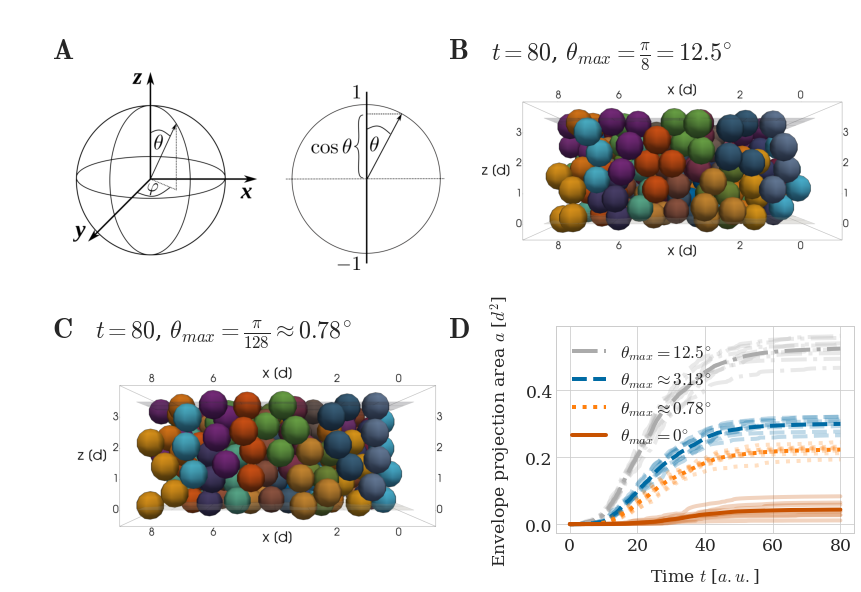

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.1, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

# TODO: make inkscape figure and import
initial1 = mpimg.imread('data/plots_manual/spherical_coordinates.png')
#crop
#initial1 = initial1[100:-100, 610:-650]
ax1.imshow(initial1)
ax1.grid(False)
ax1.axis('off')
#ax1.set_title(r'$\bf a$  Initial condition')
ax1.annotate(r'$\bf A$', (0.06, 0.9), xycoords='figure fraction', fontsize=28)

final1 = mpimg.imread(dir_angle_pi_8+'0/threshold_48_minus_y_t800.png')
#crop
final1 = final1[100:-100, 500:-600]
ax2.imshow(final1)
ax2.grid(False)
ax2.axis('off')
#ax2.set_title(r'$\bf b$  $t=T$, $n_{max}=6$')
ax2.annotate(r'$\bf B$', (0.52, 0.9), xycoords='figure fraction', fontsize=28)
ax2.annotate(r'$t=80$, $\theta_{max} = \frac{\pi}{8} = 12.5^{\circ}$', (0.57, 0.9), xycoords='figure fraction', fontsize=24)


final2 = mpimg.imread(dir_angle_pi_128+'0/threshold_48_minus_y_t800.png')
#crop
final2 = final2[100:-100, 500:-650]
ax3.imshow(final2)
ax3.grid(False)
ax3.axis('off')
#ax3.set_title(r'$\bf c$  $t=T$, $n_{max}=8$')
ax3.annotate(r'$\bf C$', (0.06, 0.43), xycoords='figure fraction', fontsize=28)
ax3.annotate(r'$t=80$, $\theta_{max} = \frac{\pi}{128} \approx 0.78^{\circ}$', (0.11, 0.43), xycoords='figure fraction', fontsize=24)


#dir_default = 'data/mesenchymal_condensation/orientation/20220223-152730/'

times_angle8, coords_angle8 = sm.read_in_data(dir_angle_pi_8 + '0/results_from_time_0/') 
ppa_av_angle8 = np.zeros(times_angle8.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_angle_pi_8+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_angle8+= ppa
    ax4.plot(times_angle8, ppa, color=defcolors[2], linestyle='-.', alpha=0.25)
ppa_av_angle8= ppa_av_angle8/8

ax4.plot(times_angle8, ppa_av_angle8, color=defcolors[2], linestyle='-.', label=r'$\theta_{max} = 12.5^{\circ}$')


times_angle32, coords_angle32 = sm.read_in_data(dir_angle_pi_32 + '0/results_from_time_0/') 
ppa_av_angle32 = np.zeros(times_angle32.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_angle_pi_32+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_angle32 += ppa
    ax4.plot(times_angle32, ppa, color=defcolors[0], linestyle='--', alpha=0.25)
ppa_av_angle32 = ppa_av_angle32/8

ax4.plot(times_angle32, ppa_av_angle32, color=defcolors[0], linestyle='--', label=r'$\theta_{max} \approx 3.13^{\circ}$')



times_angle128, coords_angle128 = sm.read_in_data(dir_angle_pi_128 + '0/results_from_time_0/') 
ppa_av_angle128 = np.zeros(times_angle128.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_angle_pi_128+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_angle128 += ppa
    ax4.plot(times_angle128, ppa, color=defcolors[1], linestyle=':', alpha=0.25)
ppa_av_angle128 = ppa_av_angle128/8

ax4.plot(times_angle128, ppa_av_angle128, color=defcolors[1], linestyle=':', label=r'$\theta_{max} \approx 0.78^{\circ}$')

times_default, coords_default = sm.read_in_data(dir_default + '0/results_from_time_0/') 
ppa_av_default = np.zeros(times_default.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_default += ppa
    ax4.plot(times_default, ppa, color=defcolors[5], alpha=0.25)
ppa_av_default = ppa_av_default/8

ax4.plot(times_default, ppa_av_default, color=defcolors[5], label=r'$\theta_{max} = 0^{\circ}$')

ax4.set_xlabel('Time $t$ [$a.u.$]')
ax4.set_ylabel('Envelope projection area $a$ [$d^2$]')
ax4.legend()
#ax4.set_title(r'$\bf d$')
ax4.annotate(r'$\bf D$', (0.52, 0.43), xycoords='figure fraction', fontsize=28)




ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.8, hh*0.8])


plt.savefig(path_to_plots+'angle_configurations.pdf', bbox_inches='tight', dpi=600)
plt.savefig(path_to_plots+'Fig6.pdf', bbox_inches='tight', dpi=600)

In [52]:
times_r, coords_r = sm.read_in_data(dir_angle_pi_8 + '0/results_from_time_0/') 
ppa_av_r = np.zeros([times_r.shape[0], 8])
for seed in range(8):
    ppa = np.loadtxt(dir_angle_pi_8+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_r[:, seed] = ppa


In [53]:
np.mean(ppa_av_r, axis=1)[-1]

0.5237615

In [54]:
np.std(ppa_av_r, axis=1)[-1]

0.03023924661346576

In [55]:
times_r, coords_r = sm.read_in_data(dir_angle_pi_32 + '0/results_from_time_0/') 
ppa_av_r = np.zeros([times_r.shape[0], 8])
for seed in range(8):
    ppa = np.loadtxt(dir_angle_pi_32+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_r[:, seed] = ppa


In [56]:
np.mean(ppa_av_r, axis=1)[-1]

0.29918599999999995

In [57]:
np.std(ppa_av_r, axis=1)[-1]

0.01895204778513394

In [58]:
times_r, coords_r = sm.read_in_data(dir_angle_pi_128 + '0/results_from_time_0/') 
ppa_av_r = np.zeros([times_r.shape[0], 8])
for seed in range(8):
    ppa = np.loadtxt(dir_angle_pi_128+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_r[:, seed] = ppa


In [59]:
np.mean(ppa_av_r, axis=1)[-1]

0.22236250000000002

In [60]:
np.std(ppa_av_r, axis=1)[-1]

0.014081273415426608

# Space is needed to initially grow columns


## Data:
- 8 random seeds, sc=1.0:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20220225-121040/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.00 --lb0
- 8 random seeds, sc=1.1:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20220225-122345/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.10 --lb0

In [7]:
dir_100 = 'data/mesenchymal_condensation/scaling/20220225-121040/'
dir_1075 = 'data/mesenchymal_condensation/orientation/20220223-152730/'
dir_110 = 'data/mesenchymal_condensation/scaling/20220225-122345/'

# # save label-path tuple
# with open(path_to_label_files+'scaling_100', 'w') as f:
#     f.write(dir_100+'0/')

# with open(path_to_label_files+'scaling_110', 'w') as f:
#     f.write(dir_110+'0/')

In [14]:
%%bash
pvpython ../analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-121040/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-121040/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55cd357f6e50): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

In [15]:
%%bash
pvpython ../analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-122345/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-122345/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55ca9d058710): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

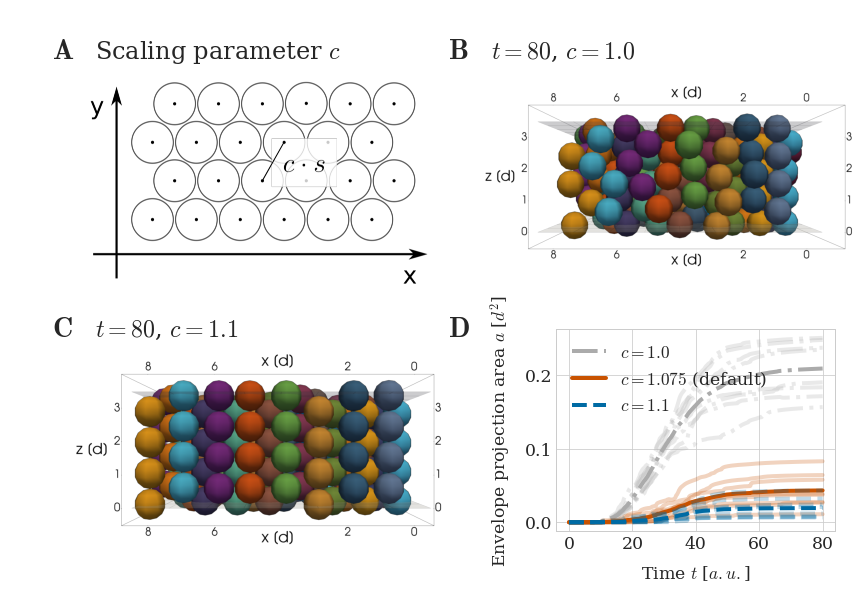

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.01, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

# TODO: make inkscape figure and import
initial1 = mpimg.imread('data/plots_manual/scaling.png')
#crop
#initial1 = initial1[100:-100, 610:-650]
ax1.imshow(initial1)
ax1.grid(False)
ax1.axis('off')
#ax1.set_title(r'$\bf A$ Scaling parameter $c$', x=0.28, y=1, fontsize=20)
ax1.annotate(r'$\bf A$', (0.06, 0.9), xycoords='figure fraction', fontsize=28)
ax1.annotate(r'Scaling parameter $c$', (0.11, 0.9), xycoords='figure fraction', fontsize=24)


final1 = mpimg.imread(dir_100+'/0/threshold_48_minus_y_t800.png')
#crop
final1 = final1[100:-100, 550:-650]
ax2.imshow(final1)
ax2.grid(False)
ax2.axis('off')
#ax2.set_title(r'$\bf B$  $t=80$, $c=1.0$', x=0.1, y=1.1, fontsize=20)
ax2.annotate(r'$\bf B$', (0.52, 0.9), xycoords='figure fraction', fontsize=28)
ax2.annotate(r'$t=80$, $c=1.0$', (0.57, 0.9), xycoords='figure fraction', fontsize=24)


final2 = mpimg.imread(dir_110+'/0/threshold_48_minus_y_t800.png')
#crop
final2 = final2[100:-100, 550:-750]
ax3.imshow(final2)
ax3.grid(False)
ax3.axis('off')
#ax3.set_title(r'$\bf C$  $t=80$, $c=1.1$', loc='left', fontsize=20)
ax3.annotate(r'$\bf C$', (0.06, 0.43), xycoords='figure fraction', fontsize=28)
ax3.annotate(r'$t=80$, $c=1.1$', (0.11, 0.43), xycoords='figure fraction', fontsize=24)



# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_100 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_100+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[2], alpha=0.25, linestyle='-.')
ppa_av_d = ppa_av_d/8
ax4.plot(times_d, ppa_av_d, color=defcolors[2], label='$c=1.0$', linestyle='-.')

dir_default = 'data/mesenchymal_condensation/orientation/20220223-152730/'

times_default, coords_default = sm.read_in_data(dir_default + '0/results_from_time_0/') 
ppa_av_default = np.zeros(times_default.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_default += ppa
    ax4.plot(times_default, ppa, color=defcolors[5], alpha=0.25)
ppa_av_default = ppa_av_default/8


## ax1 - scaling
ax4.plot(times_default, ppa_av_default, color=defcolors[5], label='$c=1.075$ (default)')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_110 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_110+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[0], alpha=0.25, linestyle='--')
ppa_av_d = ppa_av_d /8
ax4.plot(times_d, ppa_av_d, color=defcolors[0], label='$c=1.1$', linestyle='--')

ax4.set_xlabel('Time $t$ [$a.u.$]')
ax4.set_ylabel('Envelope projection area $a$ [$d^2$]')
ax4.legend()
#ax4.set_title(r'$\bf D$', x=-0.39, y=0.9, fontsize=20)
ax4.annotate(r'$\bf D$', (0.52, 0.43), xycoords='figure fraction', fontsize=28)

ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.75, hh*0.75])


plt.savefig(path_to_plots+'scaling_configurations.pdf', bbox_inches='tight', dpi=600)
plt.savefig(path_to_plots+'Fig7.pdf', bbox_inches='tight', dpi=600)

# Initial distance from the perichondrial boundary is beneficial for straight column growth


Data:
- 8 random seeds
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20220225-125830/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --flat --lb0
- 8 random seeds
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20220225-131527/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --flat

In [9]:
dir_default = 'data/mesenchymal_condensation/orientation/20220223-152730/'
dir_flat = 'data/mesenchymal_condensation/flat/20220225-131527/'
dir_lb0 = 'data/mesenchymal_condensation/flat/20220225-125830/'

# # save label-path tuple
# with open(path_to_label_files+'flat', 'w') as f:
#     f.write(dir_flat+'0/')
    
# # save label-path tuple
# with open(path_to_label_files+'lb0', 'w') as f:
#     f.write(dir_lb0+'0/')


In [21]:
%%bash
pvpython ../analysis/paraview_show_clonal_patches_flat.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-125830/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-125830/0/
Time step is 800
Start time is 0


ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/IO/XML/vtkXMLReader.cxx, line 262
vtkPVDReader (0x5632e7eb2fa0): Error opening file /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20220225-125830/0/results_from_time_0/results.pvd

ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/ParaViewCore/VTKExtensions/Default/vtkPVDReader.cxx, line 134
vtkPVDReader (0x5632e7eb2fa0): Could not read file information

ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Common/ExecutionModel/vtkExecutive.cxx, line 784
vtkPVCompositeDataPipeline (0x5632e7e909b0): Algorithm vtkPVDReader(0x5632e7eb2fa0) returned failure for request: vtkInformation (0x5632ea31ecb0)
  Debug: Off
  Modified Time: 200411
  Reference Count: 1
  Registered Events: (none)
  Request: REQUEST_DATA_OBJECT
  ALGORITHM_AFTER_FORWARD: 1
  FORWARD_DIRECTION: 0



ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/IO/XML/vtkXMLReader.cxx, line 262
vtkPVDReader (0x5

In [20]:
%%bash
pvpython ../analysis/paraview_show_clonal_patches_flat.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/flat/20220225-131527/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/flat/20220225-131527/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55c47104b1a0): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

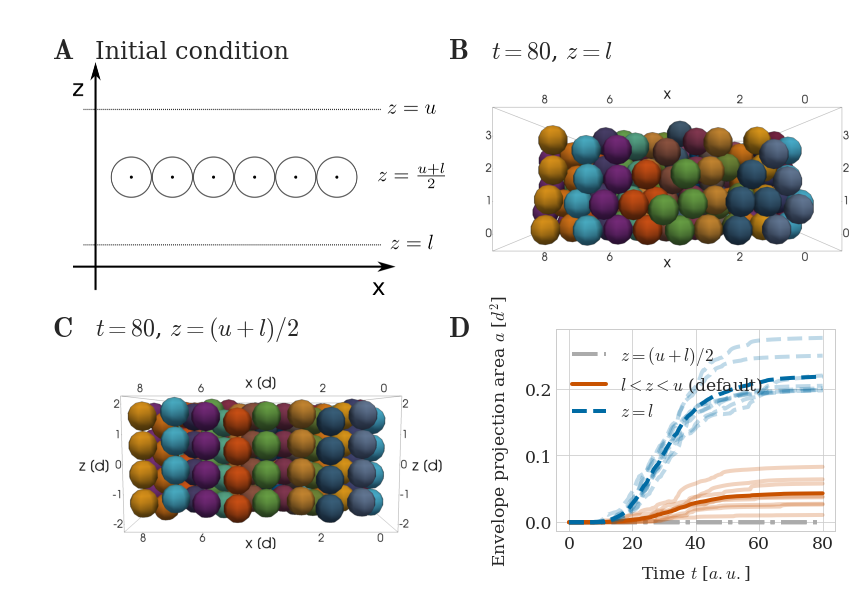

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.01, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

initial1 = mpimg.imread('data/plots_manual/flat.png')
#crop
#initial1 = initial1[100:-100, 610:-650]
ax1.imshow(initial1)
ax1.grid(False)
ax1.axis('off')
#ax1.set_title(r'$\bf A$  Initial condition', loc='left', fontsize=20)
ax1.annotate(r'$\bf A$', (0.06, 0.9), xycoords='figure fraction', fontsize=28)
ax1.annotate(r'Initial condition', (0.11, 0.9), xycoords='figure fraction', fontsize=24)

final1 = mpimg.imread(dir_lb0+'/0/threshold_48_minus_y_t800.png')
#crop
final1 = final1[100:-100, 610:-650]
ax2.imshow(final1)
ax2.grid(False)
ax2.axis('off')
#ax2.set_title(r'$\bf B$  $t=80$, $z=l$', loc='left', fontsize=20)
ax2.annotate(r'$\bf B$', (0.52, 0.9), xycoords='figure fraction', fontsize=28)
ax2.annotate(r'$t=80$, $z=l$', (0.57, 0.9), xycoords='figure fraction', fontsize=24)

final2 = mpimg.imread(dir_flat+'/0/threshold_48_minus_y_t800.png')
#crop
final2 = final2[80:-80, 610:-610]
ax3.imshow(final2)
ax3.grid(False)
ax3.axis('off')
#ax3.set_title(r'$\bf C$  $t=80$, $z=(u+l)/2$', loc='left', fontsize=20)
ax3.annotate(r'$\bf C$', (0.06, 0.43), xycoords='figure fraction', fontsize=28)
ax3.annotate(r'$t=80$, $z=(u+l)/2$', (0.11, 0.43), xycoords='figure fraction', fontsize=24)


# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_flat + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_flat+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[2], alpha=0.25, linestyle='-.')
ppa_av_d = ppa_av_d/8
ax4.plot(times_d, ppa_av_d, color=defcolors[2], label='$z=(u+l)/2$', linestyle='-.')

dir_default = 'data/mesenchymal_condensation/orientation/20220223-152730/'

times_default, coords_default = sm.read_in_data(dir_default + '0/results_from_time_0/') 
ppa_av_default = np.zeros(times_default.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_default += ppa
    ax4.plot(times_default, ppa, color=defcolors[5], alpha=0.25)
ppa_av_default = ppa_av_default/8


## ax1 - scaling
ax4.plot(times_default, ppa_av_default, color=defcolors[5], label='$l<z<u$ (default)')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_lb0 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_lb0+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[0], alpha=0.25, linestyle='--')
ppa_av_d = ppa_av_d /8
ax4.plot(times_d, ppa_av_d, color=defcolors[0], label='$z=l$', linestyle='--')

ax4.set_xlabel('Time $t$ [$a.u.$]')
ax4.set_ylabel('Envelope projection area $a$ [$d^2$]')
ax4.legend()
#ax4.set_title(r'$\bf D$', x=-0.4, y=0.85, fontsize=20)
ax4.annotate(r'$\bf D$', (0.52, 0.43), xycoords='figure fraction', fontsize=28)

ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.75, hh*0.75])


plt.savefig(path_to_plots+'flat_configurations.pdf', bbox_inches='tight', dpi=600)
plt.savefig(path_to_plots+'Fig8.pdf', bbox_inches='tight', dpi=600)

# Order in the columns can only be maintained until a certain thickness of the sheet

Data:

- 8 random seeds, psl 8:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20220301-125119/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 7.5 --psl 8 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0
- 8 random seeds, psl 6, longer run (needed for continue experiment):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20220301-141246/ --S 0 --T 130.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 5.5 --psl 6 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0



In [11]:

dir_6 = 'data/mesenchymal_condensation/order/20220301-141246/'
seed = 7

# # save label-path tuple
# with open(path_to_label_files+'psl_6', 'w') as f:
#     f.write(dir_6+str(seed)+'/')

dir_8 = 'data/mesenchymal_condensation/order/20220301-125119/'

# # save label-path tuple
# with open(path_to_label_files+'psl_8', 'w') as f:
#     f.write(dir_8+str(seed)+'/')


In [17]:
%%bash
pvpython analysis/paraview_show_clonal_patches_order.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-141246/7/ -t 80 -u 5.5

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20220301-141246/7/
Time step is 800
Start time is 0
Upper boundary will be placed at 5.5


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

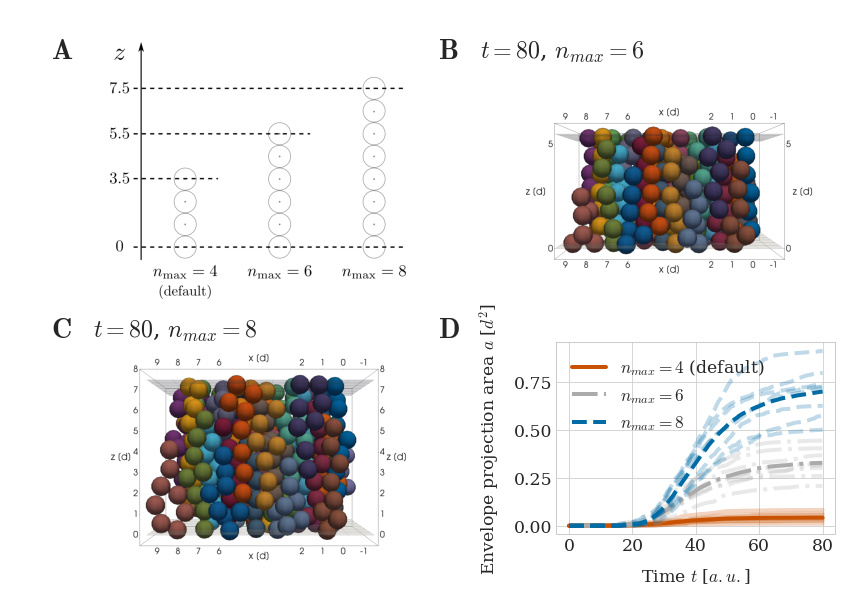

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 
                                             figsize=(14,10), 
                                             gridspec_kw={'height_ratios': [1,1], 'hspace': 0.12, 'wspace':0.1},
                                             #constrained_layout=True
                                            )

# TODO: make inkscape figure and import
initial1 = mpimg.imread('data/plots_manual/location_boundary_depending_on_n_max.png')
#crop
#initial1 = initial1[100:-100, 610:-650]
ax1.imshow(initial1)
ax1.grid(False)
ax1.axis('off')
#ax1.set_title(r'$\bf a$  Initial condition')
ax1.annotate(r'$\bf A$', (0.06, 0.9), xycoords='figure fraction', fontsize=28)

final1 = mpimg.imread(dir_6+'7/threshold_48_minus_y_t800.png')
#crop
final1 = final1[100:-100, 500:-500]
ax2.imshow(final1)
ax2.grid(False)
ax2.axis('off')
#ax2.set_title(r'$\bf b$  $t=T$, $n_{max}=6$')
ax2.annotate(r'$\bf B$', (0.52, 0.9), xycoords='figure fraction', fontsize=28)
ax2.annotate(r'$t=80$, $n_{max}=6$', (0.57, 0.9), xycoords='figure fraction', fontsize=24)


final2 = mpimg.imread(dir_8+'7/threshold_48_minus_y_t800.png')
#crop
final2 = final2[100:-100, 500:-500]
ax3.imshow(final2)
ax3.grid(False)
ax3.axis('off')
#ax3.set_title(r'$\bf c$  $t=T$, $n_{max}=8$')
ax3.annotate(r'$\bf C$', (0.06, 0.43), xycoords='figure fraction', fontsize=28)
ax3.annotate(r'$t=80$, $n_{max}=8$', (0.11, 0.43), xycoords='figure fraction', fontsize=24)


dir_default = 'data/mesenchymal_condensation/orientation/20220223-152730/'

times_default, coords_default = sm.read_in_data(dir_default + '0/results_from_time_0/') 
ppa_av_default = np.zeros(times_default.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_default += ppa
    ax4.plot(times_default, ppa, color=defcolors[5], alpha=0.25)
ppa_av_default = ppa_av_default/8


## ax1 - scaling
ax4.plot(times_default, ppa_av_default, color=defcolors[5], label='$n_{max}= 4$ (default)')


# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_6 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_6+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d[:800], ppa[:800], color=defcolors[2], alpha=0.25, linestyle='-.')
ppa_av_d = ppa_av_d/8
ax4.plot(times_d[:800], ppa_av_d[:800], color=defcolors[2], label='$n_{max}=6$', linestyle='-.')



# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_8 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_8+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax4.plot(times_d, ppa, color=defcolors[0], alpha=0.25, linestyle='--')
ppa_av_d = ppa_av_d /8
ax4.plot(times_d, ppa_av_d, color=defcolors[0], label='$n_{max}=8 $', linestyle='--')

ax4.set_xlabel('Time $t$ [$a.u.$]')
ax4.set_ylabel('Envelope projection area $a$ [$d^2$]')
ax4.legend()
#ax4.set_title(r'$\bf d$')
ax4.annotate(r'$\bf D$', (0.52, 0.43), xycoords='figure fraction', fontsize=28)

ll, bb, ww, hh = ax4.get_position().bounds 
ax4.set_position([ll+0.2*ww, bb+0.2*hh, ww*0.75, hh*0.75])


plt.savefig(path_to_plots+'order_configurations.pdf', bbox_inches='tight', dpi=600)
plt.savefig(path_to_plots+'Fig9.pdf', bbox_inches='tight', dpi=600)

# It is more efficient to keep order by increasing column size than to grow larger columns from scratch

- 8 random seeds: 
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20220301-143843/ --S 0 --T 50.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue --lb0

In [13]:
dir_continue = 'data/mesenchymal_condensation/continue/20220301-143843/'
seed = 7
# save label-path tuple
# with open(path_to_label_files+'continue', 'w') as f:
#     f.write(dir_continue+str(seed)+'/')

In [29]:
%%bash
pvpython analysis/paraview_show_clonal_patches_continue.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/continue/20220301-143843/7/ -t 800 -s 100

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/continue/20220301-143843/0/
Time step is 800
Start time is 100


ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/IO/XML/vtkXMLReader.cxx, line 262
vtkPVDReader (0x5601ee1629d0): Error opening file /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/continue/20220301-143843/0/results_from_time_100/results.pvd

ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/ParaViewCore/VTKExtensions/Default/vtkPVDReader.cxx, line 134
vtkPVDReader (0x5601ee1629d0): Could not read file information

ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Common/ExecutionModel/vtkExecutive.cxx, line 784
vtkPVCompositeDataPipeline (0x5601ee14c200): Algorithm vtkPVDReader(0x5601ee1629d0) returned failure for request: vtkInformation (0x5601f05cbb20)
  Debug: Off
  Modified Time: 200411
  Reference Count: 1
  Registered Events: (none)
  Request: REQUEST_DATA_OBJECT
  FORWARD_DIRECTION: 0
  ALGORITHM_AFTER_FORWARD: 1



ERROR: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/IO/XML/vtkXMLReader.cxx, line 262
vtkPVDReader (

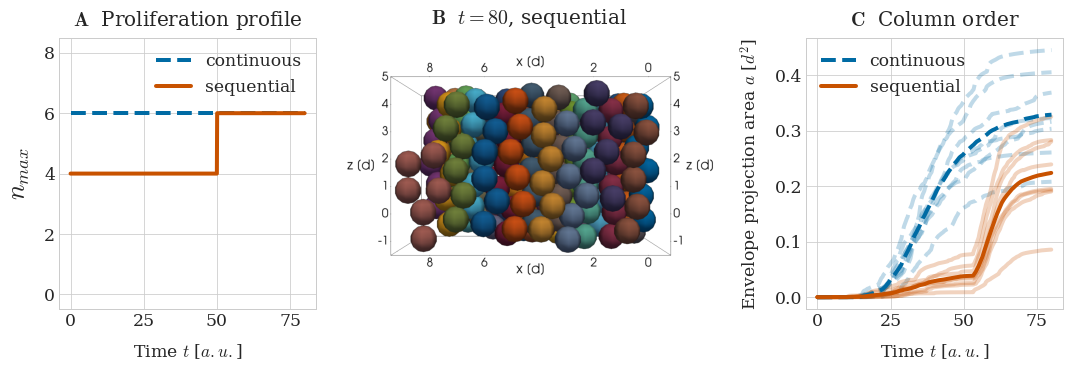

In [14]:
#fig, axd = plt.subplot_mosaic([['upper', 'upper'],
#                               ['lower left', 'lower right']],
#                              figsize=(14, 10), gridspec_kw={'hspace': 0.3, 'wspace':0.3})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                             figsize=(18,5),
                                             gridspec_kw={'wspace':0.45}
                                             #constrained_layout=True
                                            )


dir_psl6 = 'data/mesenchymal_condensation/order/20220301-141246/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_psl6 + '7/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt(dir_psl6+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d += ppa
    ax3.plot(times_d[:801], ppa[:801], color=defcolors[0], alpha=0.25, linestyle='--')
    #axd['lower right'].plot(times_d[:801], ppa[:801], color=defcolors[seed])
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data(dir_continue+ '7/results_from_time_0/') 
times_r2, coords_r2 = sm.read_in_data(dir_continue + '7/results_from_time_50/') 

ppa_av_r = np.zeros(len(times_r)+len(times_r2))
for seed in range(8):
    ppa = np.zeros(len(times_r)+len(times_r2))
    ppa[:len(times_r)] = np.loadtxt(dir_continue+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa[len(times_r):] = np.loadtxt(dir_continue+str(seed)+'/results_from_time_50/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ax3.plot(np.concatenate((times_r, times_r2))[:801], ppa[:801], color= defcolors[5], alpha=0.25)
    #axd['lower right'].plot(np.concatenate((times_r, times_r2))[:801], ppa[:801], color= defcolors[seed])
    ppa_av_r += ppa
ppa_av_r = ppa_av_r /8


ax3.plot(times_d[:801], ppa_av_d[:801], color=defcolors[0], label='continuous', linestyle='--')
ax3.plot(np.concatenate((times_r, times_r2))[:801], ppa_av_r[:801], color=defcolors[5], label='sequential')
ax3.legend()
ax3.set_title(r'$\bf{C}$  Column order', fontsize=20)

ax3.set_ylabel('Envelope projection area $a$ [$d^2$]')
ax3.set_xlabel('Time $t$ [$a.u.$]')

#ax1.get_shared_y_axes().join(ax1, ax2)



n_max = 6*np.ones((801, 1))
ax1.plot(times_d[:801], n_max, color=defcolors[0], label='continuous', linestyle='--')
ax1.set_xlabel('Time $t$ [$a.u.$]')

#ax1.set_title(r'$\bf{(b)}$ continuous')
#axd['upper right'].set_yticklabels([])
#axd['upper left'].set_ylabel('$n_{max}$', fontsize=20)

n_max = np.ones((801, 1))
n_max[:501] = 4
n_max[501:] = 6
ax1.plot(times_d[:801], n_max, color=defcolors[5], label='sequential')
ax1.set_xlabel('Time $t$ [$a.u.$]')
ax1.set_ylabel('$n_{max}$', fontsize=26)
ax1.set_ylim([-0.5,8.5])
ax1.set_title(r'$\bf{A}$  Proliferation profile', fontsize=20)
ax1.legend()


snapshot = mpimg.imread(dir_continue+'7/threshold_47_minus_y_t800.png')
ax2.imshow(snapshot[150:-150, 550:-350])
ax2.axis('off')
ax2.set_title(r'$\bf{B}$  $t=80$, sequential           ', fontsize=20)

ll, bb, ww, hh = ax2.get_position().bounds 
ax2.set_position([ll-ww*0.35, bb-hh*0.3, ww*1.7, hh*1.7])

plt.savefig(path_to_plots+'ppa_continue_1x3.pdf', bbox_inches='tight', dpi=600)
plt.savefig(path_to_plots+'Fig10.pdf', bbox_inches='tight', dpi=600)